## 필요한 라이브러리 함수들 Import하기

In [78]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [79]:
# 그래프의 크기 정하기
# Figure.figsize 라고 했을 때 오류가 발생했다.
## 이유는 rcParams의 유효한 parameter가 아니라고함.
## rcParams.keys()를 활용해서 valid parameters를 확인할 수 있다.
plt.rcParams[ "figure.figsize" ] = (10,10)
# 각각 2차원과 3차원에서 사용할 원점 선언
origin2D = np.array([0,0])
origin3D = np.array([0,0,0])
# 뒤에서 상수처럼 사용하기 위해서 기준값을 scale(=10) 이라고 정한다.
# 다른 언어와는 다르게 미리 변수를 타입과 이름으로 선언해줄 필요가 없어서 참 간편하다.
scale = 10

# (행)벡터, 열벡터를 선언할 수 있는 멤버 함수들

In [80]:
print(np.array([1,0]))
#행 방향으로 벡터를 쌓는다.
print(np.hstack([1,0]))

#아래 줄이 실행된 것을 보면 가로로 길어지는 것을 알 수 있다.
## 이해했던 바와는 다르게 쌓이며, 벡터의 차원도 묶어서 입력한 것과는 다르게 일렬로 나열되어있다.
print(np.hstack([[1,0],[0,1],[0,0],[1,1]]))

#그런데 신기하게도 한번 더 묶으니 이번에 묶은 것은 다른 행으로 구분되었다.
print(np.hstack([[[1,0],[0,1]],[[0,0],[1,1]]]))

#print(np.hstack([[1,0]],[[0,1]],[[0,0]],[[1,1]]))
## 괄호를 여러 곳에서 묶어봤지만 차이를 알기가 어려웠다.

### https://numpy.org/doc/stable/reference/generated/numpy.hstack.html
## manual을 보고 대괄호로 행을 구분할 수 있는건가? 싶어서 아래 줄을 입력해봤는데 이건 또 다르게 출력되었다.
print(np.hstack([[[1,0],[0,1]],[[0,0],[1,1]],[[1,1],[0,0]]]))
#예상한 결과는 3행 4열의 matrix였는데 도저히 이유를 모르겠다.

print(np.hstack([[[1,7],[2,8]],[[3,9],[4,10]],[[5,11],[6,12]]]))
print(np.hstack([[[1,2],[7,8]],[[3,4],[9,10]],[[5,6],[11,12]]]))
# 완벽히 이해해버렸다. [] 단위 마다 원소 하나 취급으로 행방향으로 들어가며 [[1행 1열],[2행 1열]]의 형태로 들어간다.

print(np.hstack([[[1,2],[5,6],[9,10]],[[3,4],[7,8],[11,12]]]))
# [[1행 1열], [2행 1열], [3행 1열]], [[1행 2열], [2행 2열], [3행 2열]] 의 형태로 들어간다.

#열 방향으로 벡터를 쌓는다.
print(np.vstack([1,0]))
print(np.vstack([[1,1],[2,2],[3,3],[4,4]]))
## 얘는 또 묶는 방법이 다른 모양이다.
print(np.vstack([[[1,1],[2,2]],[[3,3],[4,4]]]))
print(np.vstack([[1,1,2,2],[3,3,4,4]]))
## 행방향으로 원하는만큼씩 묶어서 넣으면 되니깐 훨씬 간편하게 넣을 수 있을 것 같다.
print(np.vstack([[1,1,2,2],[3,3,4,4],[5,5,6,6]]))

[1 0]
[1 0]
[1 0 0 1 0 0 1 1]
[[1 0 0 0]
 [0 1 1 1]]
[[1 0 0 0 1 1]
 [0 1 1 1 0 0]]
[[ 1  7  3  9  5 11]
 [ 2  8  4 10  6 12]]
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[1]
 [0]]
[[1 1]
 [2 2]
 [3 3]
 [4 4]]
[[1 1]
 [2 2]
 [3 3]
 [4 4]]
[[1 1 2 2]
 [3 3 4 4]]
[[1 1 2 2]
 [3 3 4 4]
 [5 5 6 6]]


# 4.1.1 Determinant: 면적(2D)/부피(3D 이상) 측정 도구

### 1) The area of the parallelogram spanned by the vectors b** and **g is $|det(b,g)|$.
#### 벡터 b와 g에 의해서 span 되는 평행사변형의 넓이 혹은 부피 (= volume)

In [81]:
g = np.vstack([1,0])
b = np.vstack([0,1])

# determinant 계산
# 1) g,b 를 column vector로 갖는 matrix A 선언하기
A = np.hstack([g,b])
print("A:")
print(A, "\n")

# 2) A의 determinant 값 구하기
print("det(A):")
print(npl.det(A))

A:
[[1 0]
 [0 1]] 

det(A):
1.0


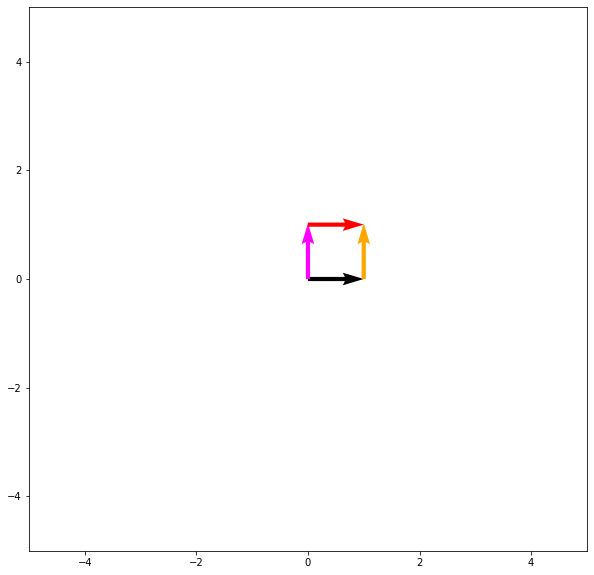

In [82]:
# 화살표 그리기: 원점(x,y), 방향(u,v)
plt.axis([-scale/2, scale/2, -scale/2, scale/2])

# 컬러는 다른 언어랑 비슷하게 입력할 수 있는 것 같다.
plt.quiver(origin2D[0], origin2D[1], g[0],g[1], scale = scale, color = "black")
plt.quiver(origin2D[0], origin2D[1], b[0],b[1], scale = scale, color = "magenta")
plt.quiver(g[0],g[1], b[0], b[1], scale = scale, color = "orange")
plt.quiver(b[0],b[1], g[0], g[1], scale = scale, color = "red")

plt.show()

In [83]:
r = np.vstack([2,0,-8])
g = np.vstack([6,1,0])
b = np.vstack([1,4,-1])
A = np.hstack([r,g,b])
# 세로(열) 방향으로 벡터 r, g, b를 구분할 수 있다.
print("A: r  g   b ")
print(A, "\n")

print("det(A):")
print(npl.det(A))

A: r  g   b 
[[ 2  6  1]
 [ 0  1  4]
 [-8  0 -1]] 

det(A):
-185.99999999999991


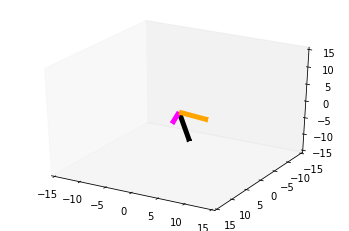

In [84]:
from mpl_toolkits import mplot3d
%matplotlib inline

# Figure setup
fig = plt.figure()
ax = plt.axes(projection="3d")
scale3D = 15
ax.set_xlim3d(-scale3D, scale3D)
ax.set_ylim3d(scale3D, -scale3D)
ax.set_zlim3d(-scale3D, scale3D)
ax.grid(b=None)

# determinant 그리기
ax.quiver(origin3D[0], origin3D[1], origin3D[2],
          A[0,0], A[1,0], A[2,0],
          color = "black", linewidths = 5, arrow_length_ratio = .05)
ax.quiver(origin3D[0], origin3D[1], origin3D[2],
          A[0,1], A[1,1], A[2,1],
          color = "orange", linewidths = 5, arrow_length_ratio = .05)
ax.quiver(origin3D[0], origin3D[1], origin3D[2],
          A[0,2], A[1,2], A[2,2],
          color = "magenta", linewidths = 5, arrow_length_ratio = .05)
plt.show()

[[ 2  6  1]
 [ 0  1  4]
 [-8  0 -1]]
그림 그리는 단계
**첫 번째 벡터**
좌표 확인 2
좌표 확인 0
좌표 확인 -8
**두 번째 벡터**
좌표 확인 6
좌표 확인 1
좌표 확인 0
*****반복문 1 회 완료*****

그림 그리는 단계
**첫 번째 벡터**
좌표 확인 2
좌표 확인 0
좌표 확인 -8
**두 번째 벡터**
좌표 확인 1
좌표 확인 4
좌표 확인 -1
*****반복문 2 회 완료*****

그림 그리는 단계
**첫 번째 벡터**
좌표 확인 6
좌표 확인 1
좌표 확인 0
**두 번째 벡터**
좌표 확인 2
좌표 확인 0
좌표 확인 -8
*****반복문 3 회 완료*****

그림 그리는 단계
**첫 번째 벡터**
좌표 확인 6
좌표 확인 1
좌표 확인 0
**두 번째 벡터**
좌표 확인 1
좌표 확인 4
좌표 확인 -1
*****반복문 4 회 완료*****

그림 그리는 단계
**첫 번째 벡터**
좌표 확인 1
좌표 확인 4
좌표 확인 -1
**두 번째 벡터**
좌표 확인 2
좌표 확인 0
좌표 확인 -8
*****반복문 5 회 완료*****

그림 그리는 단계
**첫 번째 벡터**
좌표 확인 1
좌표 확인 4
좌표 확인 -1
**두 번째 벡터**
좌표 확인 6
좌표 확인 1
좌표 확인 0
*****반복문 6 회 완료*****

반복문은 언제 탈출하지? (2, 1)
여기서 출력 되는건가?


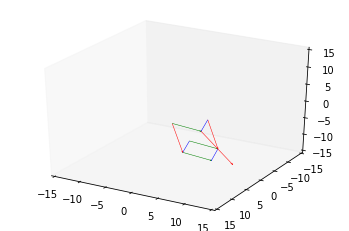

In [85]:
import itertools as it
# 그려질 plt 그래프에서 사용할 길이, 폭, 범주 등을 미리 quiverkey에 저장한다.
quiverkey = dict(linewidths = .5, arrow_length_ratio = .05)

r = np.vstack([2,0,-8])
g = np.vstack([6,1,0])
b = np.vstack([1,4,-1])
A = np.hstack([r,g,b])

print(A)

c = ["red","green","blue"]
count = 0


from mpl_toolkits import mplot3d
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection="3d")
scale3D = 15
ax.set_xlim3d(-scale3D, scale3D)
ax.set_ylim3d(scale3D, -scale3D)
ax.set_zlim3d(-scale3D, scale3D)
ax.grid(b=None)

# 이건 에러 검출이 되는데 나머지들은 왜 실행도 안되면서 에러 검출도 안되는걸까,,
## print(내맘대로)

# 에지(테두리) 그리기 반복

# for 조건문에서 에러가 검출되는 듯 하다. >> 조건문은 정상적으로 실행된다.
## quiver([X, Y], U, V, [C], **kw) << 메뉴얼 상의 syntax
## X, Y define the arrow locations, U, V define the arrow directions, and C optionally sets the color.

for i in [ i for i in list(it.product([0,1,2],repeat = 2))if i[0]!= i[1]]:
    ### 묶어준다고 해결되는 것도 아니다.
    print("그림 그리는 단계")
    print("**첫 번째 벡터**")
    print("좌표 확인", A[0,i[0]])
    print("좌표 확인", A[1,i[0]])
    print("좌표 확인", A[2,i[0]])
    print("**두 번째 벡터**")
    print("좌표 확인", A[0,i[1]])
    print("좌표 확인", A[1,i[1]])
    print("좌표 확인", A[2,i[1]])
    ### 근데 왜 인자가 총 8개가 들어가는거지 ? XYZ 좌표라고 한다면 어째서 그려지지 않는거지?
    ### quiver(self, length, arrow_length_ratio, pivot, normalize, *args, **kwargs)
    ax.quiver(A[0,i[0]], A[1, i[0]], A[2, i[0]],
              A[0, i[1]], A[1, i[1]], A[2, i[1]],
              color = c[i[1]], **quiverkey)
    count += 1
    print("*****반복문", count, "회 완료*****\n")

print("반복문은 언제 탈출하지?",i)
print("여기서 출력 되는건가?")
ax.quiver((A[0,1]+A[0,2]), A[1,1]+A[1,2], A[2,1]+A[2,2],A[0,1], A[1,0], A[2,0],color = "red", **quiverkey)
ax.quiver(A[0,2]+A[0,0], A[1,2]+A[1,0], A[2,2]+A[2,0],
         A[0,1], A[1,1], A[2,1],
         color = "green", **quiverkey)
ax.quiver(A[0,0]+A[0,1], A[1,0]+A[1,1], A[2,0]+A[2,1],
         A[0,2], A[1,2], A[2,2],
         color = "blue", **quiverkey)

#뭐야 이거 왜 출력이 안되는걸까
# restart & clear output 했는데도 안먹힌다. 도저히 이유를 알 수가 없다.
## 에러도 검출되지 않는 상황이라 더더욱 답답하다.. 이유가 뭘까

## >>이유는 정확히 모르겠지만 한번 더 import 하고 초기화해주니 해결되었다.

# 잘 정리해서 다시 한번 그래프만 출력해보겠습니다.
#### 제가 색약이라 색과 선이 잘 안보여서 약간의 조절만 했습니다.

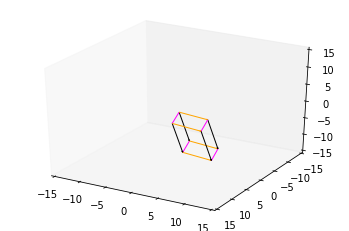

In [86]:
from mpl_toolkits import mplot3d
%matplotlib inline

fig = plt.figure()
ax = plt.axes(projection="3d")
scale3D = 15
ax.set_xlim3d(-scale3D, scale3D)
ax.set_ylim3d(scale3D, -scale3D)
ax.set_zlim3d(-scale3D, scale3D)
ax.grid(b=None)

r = np.vstack([2,0,-8])
g = np.vstack([6,1,0])
b = np.vstack([1,4,-1])
A = np.hstack([r,g,b])
c = ["black","orange","magenta"]
# 잘 안보이니 선만 두껍게 만들겠습니다.
quiverkey = dict(linewidths = 1., arrow_length_ratio = .05)

ax.quiver(origin3D[0], origin3D[1], origin3D[2],
          A[0,0], A[1,0], A[2,0],
          color = "black", **quiverkey)
ax.quiver(origin3D[0], origin3D[1], origin3D[2],
          A[0,1], A[1,1], A[2,1],
          color = "orange", **quiverkey)
ax.quiver(origin3D[0], origin3D[1], origin3D[2],
          A[0,2], A[1,2], A[2,2],
          color = "magenta", **quiverkey)

import itertools as it


for i in [ i for i in list(it.product([0,1,2],repeat = 2))if i[0]!= i[1]]:
    ax.quiver(A[0,i[0]], A[1, i[0]], A[2, i[0]],
              A[0, i[1]], A[1, i[1]], A[2, i[1]],
              color = c[i[1]], **quiverkey)

ax.quiver((A[0,1]+A[0,2]), A[1,1]+A[1,2], A[2,1]+A[2,2],
          A[0,0], A[1,0], A[2,0],
          color = "black", **quiverkey)
ax.quiver(A[0,2]+A[0,0], A[1,2]+A[1,0], A[2,2]+A[2,0],
         A[0,1], A[1,1], A[2,1],
         color = "orange", **quiverkey)
ax.quiver(A[0,0]+A[0,1], A[1,0]+A[1,1], A[2,0]+A[2,1],
         A[0,2], A[1,2], A[2,2],
         color = "magenta", **quiverkey)

plt.show()

# 4.1.3 Trace 값 구하기

In [87]:
A = np.array([[3,4,-8],
             [1,3,7],
             [6,-11,2]])
print("A: 각 벡터는 transpose form >> 열벡터를 뜻한다.")
print(A, "\n")

print("Trace(A): ")
print(np.trace(A))

A: 각 벡터는 transpose form >> 열벡터를 뜻한다.
[[  3   4  -8]
 [  1   3   7]
 [  6 -11   2]] 

Trace(A): 
8


#### x, y는 columns 이기 때문에 아래와 같이 연산하면 외적 내적 순서로 연산이 이뤄진다.

In [88]:
x = np.vstack([3,-1])
print(x, "\n")
y = np.vstack([8,5])
print(y, "\n")

print("tr(xy^T): 외적")
yt = np.transpose(y)
print(np.trace(x.dot(yt)))

print("x^Ty: 내적")
xt = np.transpose(x)
print(np.trace(xt.dot(y)))

[[ 3]
 [-1]] 

[[8]
 [5]] 

tr(xy^T): 외적
19
x^Ty: 내적
19


# 4.2 Cholesky decomposition

### $A = LL^T$ : A는 L과 L^T의 형태로 쪼개질 수 있다.

In [105]:
A = np.vstack([[3,2,2], [2,3,2],[2,2,3]])
print("A: \n", A ,"\n")
print("*****Cholesky(A)*****\nL:\n", npl.cholesky(A),"\n")
print("L^T: \n ", np.transpose( npl.cholesky(A)),"\n")

A: 
 [[3 2 2]
 [2 3 2]
 [2 2 3]] 

*****Cholesky(A)*****
L:
 [[1.73205081 0.         0.        ]
 [1.15470054 1.29099445 0.        ]
 [1.15470054 0.51639778 1.18321596]] 

L^T: 
  [[1.73205081 1.15470054 1.15470054]
 [0.         1.29099445 0.51639778]
 [0.         0.         1.18321596]] 



# 4.3 Eigendecomposition

### 1) eigen values & eigen vectors of A
### $Au = \lambda u$
##### 람다 수식 표현 방법은 (역슬래시)람다, 이런식으로 쓰면 된다.

In [112]:
A = np.vstack([[4,2],[1,3]])
print("A: \n", A, "\n")

e_values, e_vectors = npl.eig(A)
print(e_values)
print(e_vectors)

u1 = np.vstack(e_vectors[: ,0])
u2 = np.vstack(e_vectors[: ,1])
print("u1: \n", u1, "\nu2: \n", u2, "\n")

l1, l2 = e_values[0], e_values[1]
print("eigen values: ", l1, l2, "\n")

# 체크 과정으로 굉장히 중요한 파트이다.
print("**********체크 과정으로 굉장히 중요한 파트이다.**********")
print("A*u1: \n", np.dot(A, u1))
print("l1*u1: \n", l1*u1)
print("A*u1: \n", np.dot(A, u2))
print("l2*u2: \n", l2*u2)
print("**********체크 과정으로 굉장히 중요한 파트이다.**********")

A: 
 [[4 2]
 [1 3]] 

[5. 2.]
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]
u1: 
 [[0.89442719]
 [0.4472136 ]] 
u2: 
 [[-0.70710678]
 [ 0.70710678]] 

eigen values:  5.0 2.0 

**********체크 과정으로 굉장히 중요한 파트이다.**********
A*u1: 
 [[4.47213595]
 [2.23606798]]
l1*u1: 
 [[4.47213595]
 [2.23606798]]
A*u1: 
 [[-1.41421356]
 [ 1.41421356]]
l2*u2: 
 [[-1.41421356]
 [ 1.41421356]]
**********체크 과정으로 굉장히 중요한 파트이다.**********


# 4.4 Singular value decomposition (SVD)

### 1) Stonehenge 이미지 파일 파악

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=960x635 at 0x7F607B2EF390>
PNG
(960, 635)
RGBA


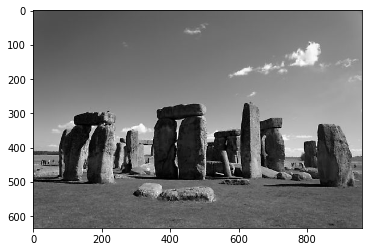

In [186]:
stonehenge = Image.open('stonehenge.png')
print(stonehenge)
print(stonehenge.format)
print(stonehenge.size)
print(stonehenge.mode)

plt.imshow(stonehenge)
plt.show()

### 2) 픽셀의 값을 0~1 사이로 normalize 하는 과정

In [187]:
imMatrix = np.array(stonehenge.convert("L"))/255.0
print(imMatrix.shape)
print(imMatrix)

(635, 960)
[[0.35294118 0.34509804 0.3372549  ... 0.48627451 0.46666667 0.48627451]
 [0.32156863 0.32941176 0.31372549 ... 0.47843137 0.45098039 0.4627451 ]
 [0.34117647 0.37647059 0.34117647 ... 0.49019608 0.47058824 0.47058824]
 ...
 [0.41568627 0.41568627 0.41960784 ... 0.39215686 0.39215686 0.4       ]
 [0.42352941 0.43137255 0.42745098 ... 0.38431373 0.39607843 0.4       ]
 [0.43137255 0.45098039 0.42745098 ... 0.37254902 0.39607843 0.39607843]]


### 3) SVD 과정 수행

(635, 960)
(635, 635) (635, 960) (960, 960)
True


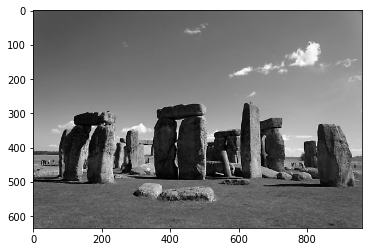

In [188]:
scalar = 1/2
shape = np.shape(imMatrix)
U, S, V = npl.svd(imMatrix)

print(shape)

# 벡터 형태로 출력받은 singular values 를 matrix 형태로 변환시키는 과정
Sd = np.hstack([np.eye(shape[0]) * S.copy(), np.zeros((shape[0], shape[1]-shape[0]))])
print(np.shape(U), np.shape(Sd), np.shape(V))

usv = U @ Sd @ V
# 두 Matrix의 연산 결과가 같은지 확인하는 용도
print( np.allclose(imMatrix, usv))

# 출력되는 그림은 원본 이미지처럼 보이지만 usv matrix들을 곱한 형태이다.
## 여기서는 실제로는 같은 이미지이기는 하지만 이것으로 True 라고 확신해서는 안된다는 뜻이다.

plt.imshow(usv, cmap = 'gray')
plt.show()

### 4) $A_i$ 시각화

(635, 1)
(1, 1)
(1, 960)
2 [(635, 960), (635, 635), (635, 960), (960, 960)]
1596 609600 0.0026181102362204723
********************  K =  1   ********************


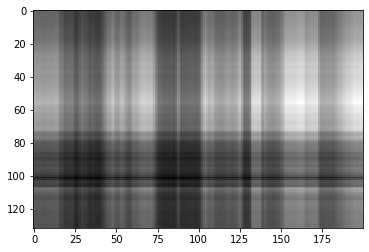

********************  K =  2   ********************


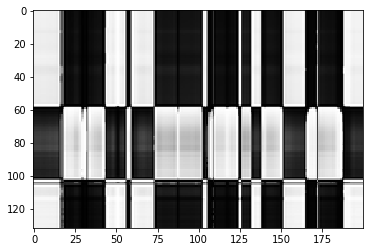

********************  K =  3   ********************


********************  K =  4   ********************


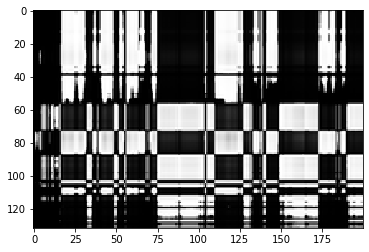

********************  K =  5   ********************


In [197]:
k = 1
print(np.shape(U[:, :k]))
print(np.shape(np.diag(S[:k])))
print(np.shape(V.T[:,:k].T))

m, n = np.shape(imMatrix)
partial, total = k*(m+n)+k, m*n
print(np.ndim(imMatrix), [np.shape(i) for i in [imMatrix, U, Sd, V]])
print(partial, total, partial/total)

size = (200, 200)
imtemp = lambda k: (np.vstack(U[:, k-1])@np.vstack([S[k-1]])@np.vstack(V[k-1]).T)*255
for i in list(range(1,6)):
    print("********************  K = ",i,"  ********************")
    im = Image.fromarray(imtemp(i).astype('uint8'))
    im.thumbnail(size, Image.ANTIALIAS)
    plt.imshow(im, cmap = 'gray')
    plt.show()

### 5) $ \hat{A_1}$ 시각화

********************  K =  1   ********************


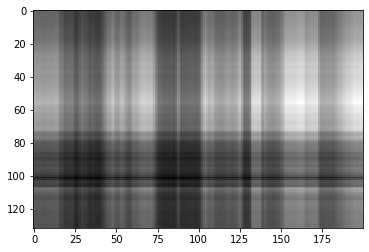

********************  K =  2   ********************


********************  K =  3   ********************


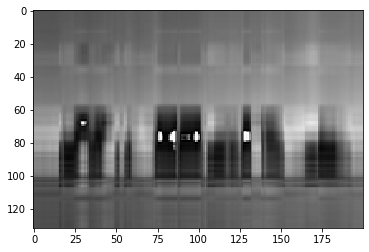

********************  K =  4   ********************


********************  K =  5   ********************


In [198]:
quality = 5
np.shape(np.diag(S[:quality]))
np.shape(U[:,:quality])
np.shape(V[:quality,:])
k = quality
m,n = np.shape(imMatrix)
partial, total = k*(m+n)+k, m*n
np.ndim(imMatrix),[np.shape(i) for i in [imMatrix,U,Sdt,V]]
partial, total, partial/total

imtemp = lambda k: (U[:,:k]@np.diag(S[:k])@V.T[:, :k].T)*255
for i in list(range(1,k+1)):
    print("********************  K = ",i,"  ********************")
    im = Image.fromarray(imtemp(i).astype('uint8'))
    im.thumbnail(size, Image.ANTIALIAS)
    plt.imshow(im, cmap = 'gray')
    plt.show()

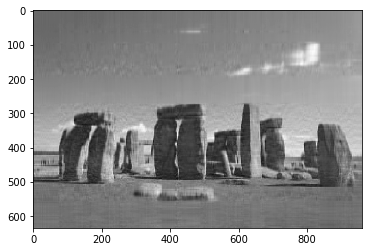

In [199]:
k = 30
im = imtemp(k)
m, n = np.shape(imMatrix)
partial,total = (k*(m+n)+k, m*n)
partial,total, partial/total

plt.imshow(im, cmap='gray')
plt.show()

# 여자친구와 찍은 사진으로 실습을 해보겠습니다


#### stonehenge 사진은 landscape 형태의 가로로 긴 이미지 파일이었습니다.

#### 그러나 제가 사용할 사진은 portrait 형태로 가로보다 세로가 긴 이미지 파일입니다.

#### 그렇기 때문에 $USV$ 에서 사용될 Sd를 변형시킬 필요가 있었습니다.

#### Sd Matrix를 만들 때 사용한것과 다른 축을 사용해야하기에 shape[0] 과 shape[1]의 자리를 바꿔줍니다.

#### $width - height$ 에서 $height - width$로 바꿔주고 Matrix의 형태는 Fat 에서 Skinny한 형태로 바뀌게 됩니다.

#### 새로운 Sd Matrix는 형태가 변해서 USV 자리에 들어가서 곱하기 연산을 할 수 없었습니다.

#### 다행히 Sd Matrix는 Diag 자리를 제외하고는 모든 원소가 0으로 채워져있었으므로,
#### Sd Matrix를 transpose하는 것으로 해결할 수 있었습니다.

#### 고로 아래 코드에서는 Sd Matrix를 Sdt Matrix로 변환시켜서 사용했습니다.

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x960 at 0x7F607B0719B0>
JPEG
(720, 960)
RGB


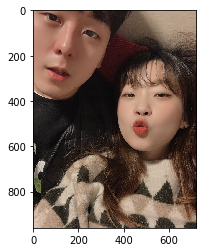

(960, 720)
[[0.62352941 0.62352941 0.62352941 ... 0.64705882 0.63921569 0.65490196]
 [0.62745098 0.62745098 0.62745098 ... 0.63921569 0.63137255 0.64705882]
 [0.63529412 0.63529412 0.63137255 ... 0.65490196 0.64705882 0.65882353]
 ...
 [0.80784314 0.80392157 0.79607843 ... 0.16078431 0.18039216 0.15294118]
 [0.80392157 0.80392157 0.80392157 ... 0.17254902 0.18823529 0.16078431]
 [0.79607843 0.8        0.80392157 ... 0.12156863 0.14901961 0.14901961]]


In [213]:
girlfriend = Image.open('girlfriend.jpg')
print(girlfriend)
print(girlfriend.format)
print(girlfriend.size)
print(girlfriend.mode)

plt.imshow(girlfriend)
plt.show()

imMatrix = np.array(girlfriend.convert("L"))/255.0
print(imMatrix.shape)
print(imMatrix)

In [214]:
scalar = 1/2
shape = np.shape(imMatrix)
U, S, V = npl.svd(imMatrix)

print(shape)

# 벡터 형태로 출력받은 singular values 를 matrix 형태로 변환시키는 과정
Sd = np.hstack([np.eye(shape[1]) * S.copy(), np.zeros((shape[1], shape[0]-shape[1]))])
print(np.shape(U), np.shape(Sd), np.shape(V))


Sdt = np.transpose(Sd)

usv = U @ Sdt @ V
# 두 Matrix의 연산 결과가 같은지 확인하는 용도
print( np.allclose(imMatrix, usv))

# 출력되는 그림은 원본 이미지처럼 보이지만 usv matrix들을 곱한 형태이다.
## 여기서는 실제로는 같은 이미지이기는 하지만 이것으로 True 라고 확신해서는 안된다는 뜻이다.

plt.imshow(usv, cmap = 'gray')
plt.show()

(960, 720)
(960, 960) (720, 960) (720, 720)
True


(960, 1)
(1, 1)
(1, 720)
2 [(960, 720), (960, 960), (960, 720), (720, 720)]
1681 691200 0.002432002314814815
********************  K =  1   ********************


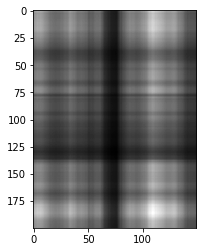

********************  K =  2   ********************


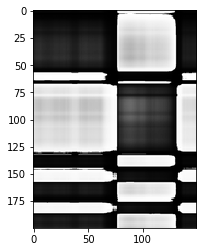

********************  K =  3   ********************


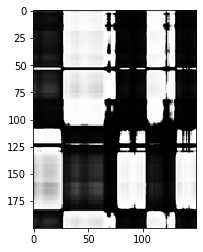

********************  K =  4   ********************


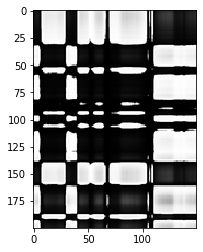

********************  K =  5   ********************


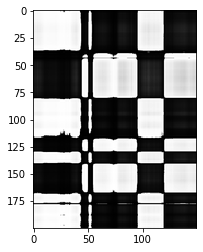

In [219]:
k = 1
print(np.shape(U[:, :k]))
print(np.shape(np.diag(S[:k])))
print(np.shape(V.T[:,:k].T))

m, n = np.shape(imMatrix)
partial, total = k*(m+n)+k, m*n
print(np.ndim(imMatrix), [np.shape(i) for i in [imMatrix, U, Sdt, V]])
print(partial, total, partial/total)

size = (200, 200)
imtemp = lambda k: (np.vstack(U[:, k-1])@np.vstack([S[k-1]])@np.vstack(V[k-1]).T)*255
for i in list(range(1,6)):
    print("********************  K = ",i,"  ********************")
    im = Image.fromarray(imtemp(i).astype('uint8'))
    im.thumbnail(size, Image.ANTIALIAS)
    plt.imshow(im, cmap = 'gray')
    plt.show()

********************  K =  1   ********************


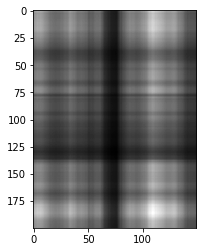

********************  K =  2   ********************


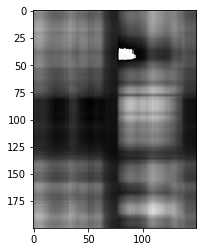

********************  K =  3   ********************


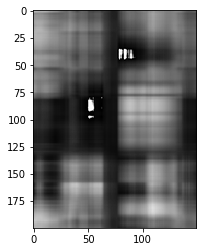

********************  K =  4   ********************


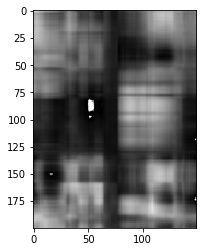

********************  K =  5   ********************


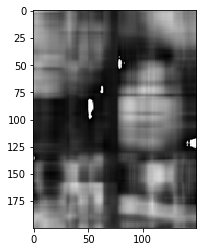

In [220]:
quality = 5
np.shape(np.diag(S[:quality]))
np.shape(U[:,:quality])
np.shape(V[:quality,:])
k = quality
m,n = np.shape(imMatrix)
partial, total = k*(m+n)+k, m*n
np.ndim(imMatrix),[np.shape(i) for i in [imMatrix,U,Sdt,V]]
partial, total, partial/total

imtemp = lambda k: (U[:,:k]@np.diag(S[:k])@V.T[:, :k].T)*255
for i in list(range(1,k+1)):
    print("********************  K = ",i,"  ********************")
    im = Image.fromarray(imtemp(i).astype('uint8'))
    im.thumbnail(size, Image.ANTIALIAS)
    plt.imshow(im, cmap = 'gray')
    plt.show()

# 여자친구와 찍은 사진이기 때문에 K 값을 상당히 크게 조정해보았습니다.

In [217]:
k = 500
im = imtemp(k)
m, n = np.shape(imMatrix)
partial,total = (k*(m+n)+k, m*n)
partial,total, partial/total

plt.imshow(im, cmap='gray')
plt.show()

### K 값을 상당히 높게 했더니 육안상 느끼기에 원본과의 차이는 색상의 차이뿐인것 같습니다.